In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import os
import hashlib

# Constants
HOUSING_PATH = './Datasets/'

In [2]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [3]:
df = load_housing_data()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


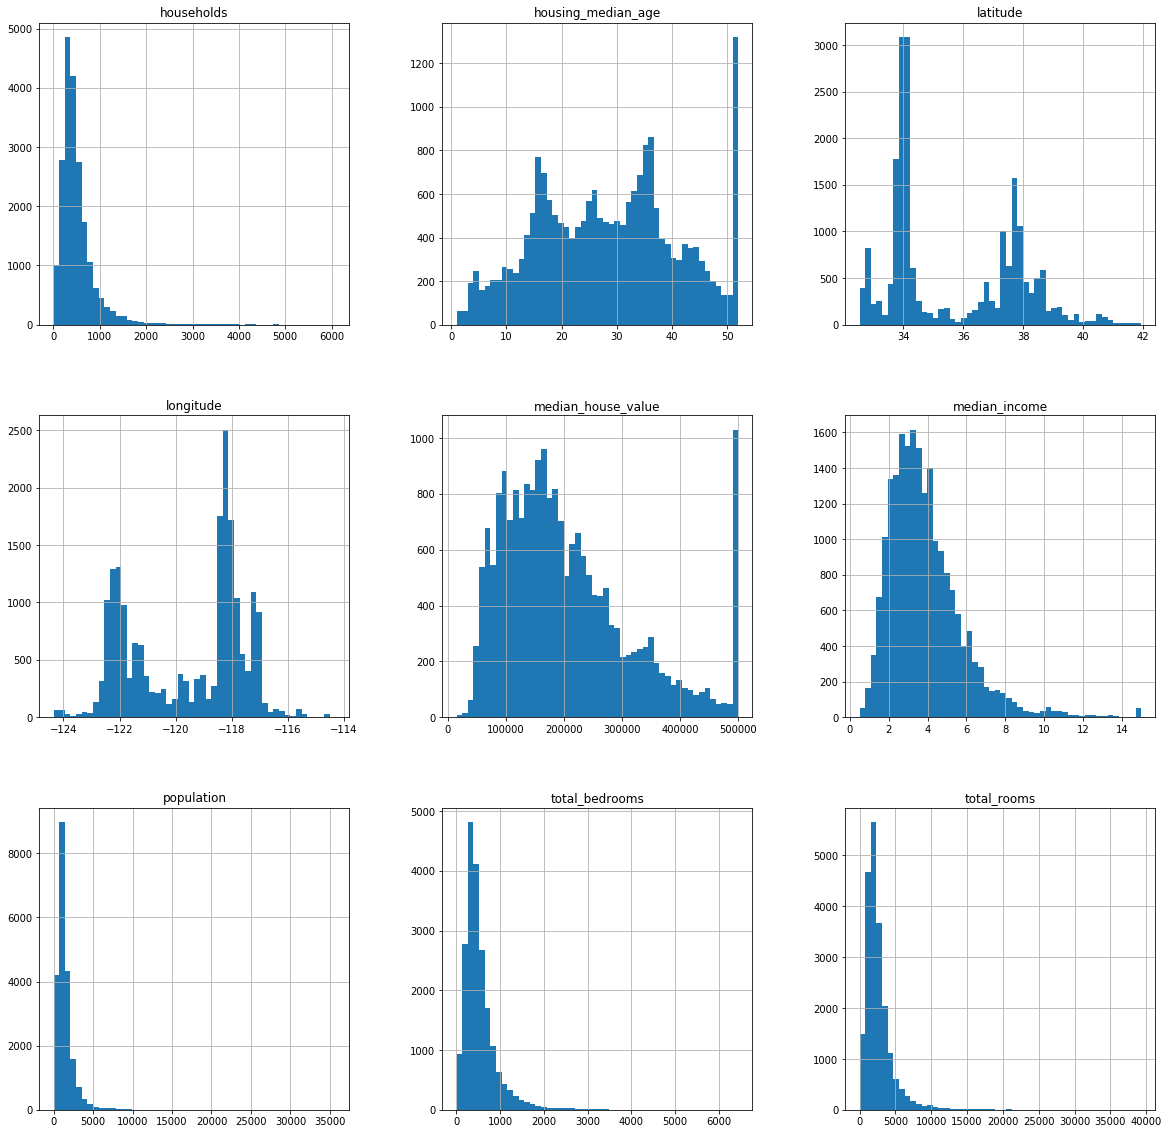

In [7]:
%matplotlib inline
df.hist(bins=50, figsize=(20, 20))
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
tr_set, tt_set = train_test_split(df, test_size=.2, random_state=42)

In [9]:
df['income_cat'] = np.ceil(df['median_income'] / 1.5)
df['income_cat'].where(df['income_cat'] < 5, 5.0, inplace=True)

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['income_cat']):
    split_train = df.loc[train_index]
    split_test = df.loc[test_index]

In [11]:
for split in (split_train, split_test):
    split.drop(['income_cat'], axis=1, inplace=True)

In [12]:
vdf = split_train.copy()

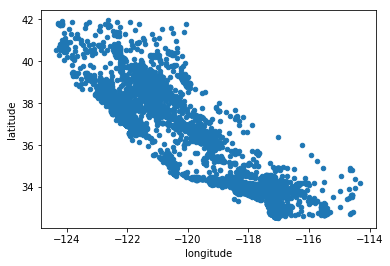

In [13]:
vdf.plot(kind='scatter', x='longitude', y='latitude')
plt.show()

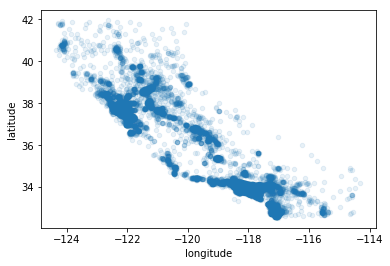

In [14]:
vdf.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)
plt.show()

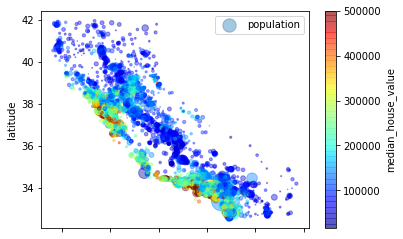

In [15]:
vdf.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, 
         s=vdf['population']/100, label='population', c='median_house_value', cmap=plt.get_cmap('jet'),
         colorbar=True)
plt.legend()
plt.show()

In [16]:
corr_matrix = vdf.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [17]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

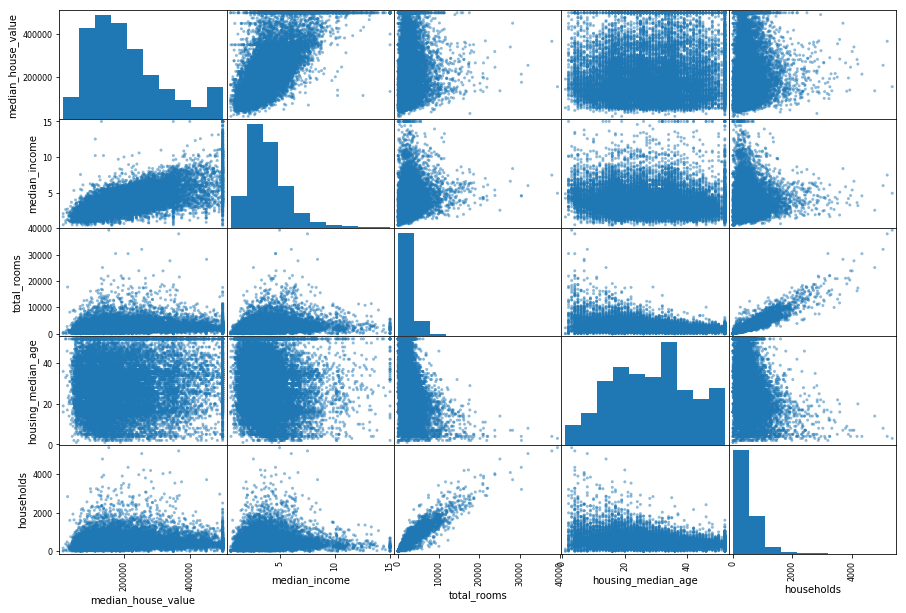

In [18]:
from pandas.plotting import scatter_matrix

attributes = corr_matrix['median_house_value'].sort_values(ascending=False).axes[0][:5].tolist()
scatter_matrix(vdf[attributes], figsize=(15, 10))
plt.show()

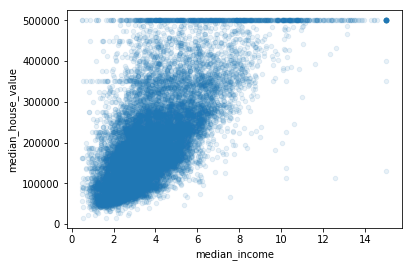

In [19]:
vdf.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)
plt.show()

In [20]:
vdf['rooms_per_household'] = vdf['total_rooms']/vdf['households']
vdf['bedrooms_per_room'] = vdf['total_bedrooms']/vdf['total_rooms']
vdf['population_per_household'] = vdf['population']/vdf['households']

In [21]:
corr_matrix = vdf.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [22]:
vdf = split_train.drop('median_house_value', axis=1)
vdf_labels = split_train['median_house_value'].copy()

In [23]:
# vdf.dropna(subset=['total_bedrooms'])
# vdf.drop('total_bedrooms', axis=1)
med = vdf['total_bedrooms'].median()
vdf['total_bedrooms'] = vdf['total_bedrooms'].fillna(med)

In [24]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')
vdf_num = vdf.drop('ocean_proximity', axis=1)
imputer.fit(vdf_num)
X = imputer.transform(vdf_num) # Pure numpy arrays
X = pd.DataFrame(X, columns=vdf_num.columns)

In [25]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [26]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
vdf_cat = vdf['ocean_proximity']
vdf_cat_enc = encoder.fit_transform(vdf_cat)
vdf_cat_enc

array([0, 0, 4, ..., 1, 0, 3])

In [27]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
vdf_cat_1hot = enc.fit_transform(vdf_cat_enc.reshape(-1, 1))
vdf_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [28]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
vdf_cat_enc = enc.fit_transform(vdf_cat)
vdf_cat_enc

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, pop_ix, hh_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_hh = X[:, rooms_ix] / X[:, hh_ix]
        pop_per_hh = X[:, pop_ix] / X[:, hh_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_hh, pop_per_hh, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_hh, pop_per_hh]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.fit_transform(vdf.values)
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

In [30]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        self.X = X
        return self
    
    def transform(self, X, y=None):
        return self.X[self.attribute_names].values
    
dq = DataFrameSelector(['longitude', 'latitude'])
dq.fit_transform(X)

array([[-121.89,   37.29],
       [-121.93,   37.05],
       [-117.2 ,   32.77],
       ...,
       [-116.4 ,   34.09],
       [-118.01,   33.82],
       [-122.45,   37.77]])

In [31]:
class MyLabelBinarizer(BaseEstimator, TransformerMixin):
    
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
        
    def fit(self, X, y=None):
        self.encoder.fit(X)
        return self
        
    def transform(self, X, y=None):
        return self.encoder.transform(X)

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler

num_attr = list(vdf_num)
cat_attr = ['ocean_proximity']

num_pipeline = Pipeline([
            ('selector', DataFrameSelector(num_attr)),
            ('imputer', Imputer(strategy='median')),
            ('attr_adder', CombinedAttributesAdder()),
            ('std_scaler', StandardScaler()),
        ])

cat_pipeline = Pipeline([
            ('selector', DataFrameSelector(cat_attr)),
            ('label_bnz', MyLabelBinarizer()),
        ])

full_pipeline = FeatureUnion(transformer_list=[
            ('num_pipeline', num_pipeline),
            ('cat_pipeline', cat_pipeline),
        ])

full_pipeline.fit(vdf)
num_pipeline.fit(vdf)
vdf_pipe = full_pipeline.transform(vdf)
vdf_pipe

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [33]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(vdf_pipe, vdf_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
some_data = vdf.iloc[:5]
some_labels = vdf_labels.iloc[:5]

full_pipelin = FeatureUnion(transformer_list=[
            ('num_pipeline', num_pipeline),
            ('cat_pipeline', cat_pipeline),
        ])
full_pipelin.fit(vdf)
some_prep = full_pipelin.transform(some_data)
print ('Predictions: \t', lin_reg.predict(some_prep)[:5])#work-around as pipeline is not working
print ('Labels: \t', list(some_labels))

Predictions: 	 [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels: 	 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [35]:
from sklearn.metrics import mean_squared_error
housing_pred = lin_reg.predict(vdf_pipe)
lin_mse = mean_squared_error(vdf_labels, housing_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [36]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(vdf_pipe, vdf_labels)
tree_pred = tree_reg.predict(vdf_pipe)
tree_mse = mean_squared_error(vdf_labels, tree_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, vdf_pipe, vdf_labels, scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)

In [41]:
def display_scores(scores):
    print ('Scores :', scores)
    print ('Mean: ', scores.mean())
    print ('Standard Deviation: ', scores.std())

In [42]:
display_scores(rmse_scores)

Scores : [67567.50812899 66817.99959969 70775.76363092 69468.88794044
 71154.70351981 74037.37792511 71156.10985629 70987.11602702
 77265.49811419 71154.24520338]
Mean:  71038.52099458383
Standard Deviation:  2832.0534517446904


In [44]:
lin_scores = cross_val_score(lin_reg, vdf_pipe, vdf_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores : [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345083
Standard Deviation:  2731.6740017983466


In [48]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(vdf_pipe, vdf_labels)
print ('Score on training set: ', np.sqrt(mean_squared_error(forest_reg.predict(vdf_pipe), vdf_labels)))
forest_scores = cross_val_score(forest_reg, vdf_pipe, vdf_labels, scoring='neg_mean_squared_error', cv=10)
forest_scores = np.sqrt(-forest_scores)
display_scores(forest_scores)

Score on training set:  22331.664519638663
Scores : [51872.15649568 50389.53302525 52716.40044094 54606.44539644
 53130.25419905 55759.86452797 51215.43796564 51677.01421516
 57382.62051079 51986.06733328]
Mean:  53073.57941102077
Standard Deviation:  2085.610664183718


In [49]:
from sklearn.externals import joblib
joblib.dump(lin_reg, 'lin_reg.pkl')
joblib.dump(tree_reg, 'tree_reg.pkl')
joblib.dump(forest_reg, 'forest_reg.pkl')

['forest_reg.pkl']

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(vdf_pipe, vdf_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [53]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [54]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [56]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print (np.sqrt(-mean_score), params)

64310.47979874971 {'max_features': 2, 'n_estimators': 3}
56226.96005449544 {'max_features': 2, 'n_estimators': 10}
53109.2158824409 {'max_features': 2, 'n_estimators': 30}
60515.94702415391 {'max_features': 4, 'n_estimators': 3}
52374.980916087006 {'max_features': 4, 'n_estimators': 10}
50755.77552028077 {'max_features': 4, 'n_estimators': 30}
59092.819549506254 {'max_features': 6, 'n_estimators': 3}
52439.509566600434 {'max_features': 6, 'n_estimators': 10}
49904.46178808564 {'max_features': 6, 'n_estimators': 30}
58647.39020079019 {'max_features': 8, 'n_estimators': 3}
52032.3657916577 {'max_features': 8, 'n_estimators': 10}
49958.21400423959 {'max_features': 8, 'n_estimators': 30}
61969.926937642915 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54194.99301763446 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60252.64296350051 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52714.462290456744 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [57]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.22027242e-02, 7.63780826e-02, 4.29450047e-02, 1.81178074e-02,
       1.69064316e-02, 1.71057429e-02, 1.61602706e-02, 3.42143912e-01,
       6.15403327e-02, 1.06297245e-01, 5.36028544e-02, 1.38350615e-02,
       1.44280924e-01, 4.14941098e-05, 1.77575206e-03, 6.66635947e-03])

In [62]:
extra_attribs = ['room_per_hh', 'bedrooms_per_room', 'pop_per_hh']
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attr + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3421439118195112, 'median_income'),
 (0.14428092449438257, 'INLAND'),
 (0.10629724547142451, 'bedrooms_per_room'),
 (0.08220272421328124, 'longitude'),
 (0.07637808261490978, 'latitude'),
 (0.061540332674169154, 'room_per_hh'),
 (0.05360285437346894, 'pop_per_hh'),
 (0.042945004699618976, 'housing_median_age'),
 (0.018117807425309114, 'total_rooms'),
 (0.01710574290541284, 'population'),
 (0.016906431588104363, 'total_bedrooms'),
 (0.016160270611428308, 'households'),
 (0.013835061475765567, '<1H OCEAN'),
 (0.0066663594683690815, 'NEAR OCEAN'),
 (0.0017757520550708917, 'NEAR BAY'),
 (4.149410977345943e-05, 'ISLAND')]

In [66]:
final_model = grid_search.best_estimator_
X_test = split_test.drop('median_house_value', axis=1)
y_test = split_test['median_house_value'].copy()

X_test_prep = full_pipeline.transform(X_test)
final_pred = final_model.predict(X_test_prep)
final_mse = mean_squared_error(final_pred, y_test)
final_rmse = np.sqrt(final_mse)
final_rmse

ValueError: Found input variables with inconsistent numbers of samples: [16512, 4128]